# Extra Notebook stuff
We've made a lot of small functions that felt like a lot of work to do for something so small. Lets look back at one of the first functions we solved, 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def dNdt(N,t):
    """
    Differential equation for radioactive decay dN/dt = -lamda*N
    
    Inputs
    ----------
    N:  Number of atoms
    t:  time
    
    Output
    ----------
    dN/dt:  Right hand side of the differential we want to solve
    """
    lam = 3.9e-12 #Decay constant for Carbon 14 half life of about 5700 years (s**-1)
    return -lam*N

In [2]:
%run '/home/cody/Physics 331/Textbook Programs/Chapter 4/euler_1d.py'
num_of_atoms = 6.022e23 #Number of atoms I want to start with (1 mole)
year = 3.154e7 #Number of seconds in a year
t_final = 50000*year #How long I want to wait for this to decay. (0,000 Years) (s)
dt = 5000*year
#Euler's method
t, N = euler_1d(num_of_atoms, 0, t_final, dt, dNdt)

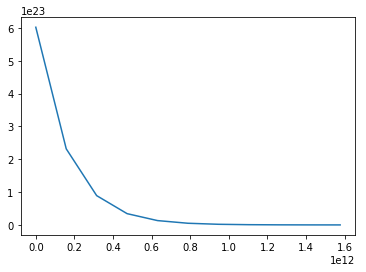

In [3]:
plt.plot(t, N)

Rather than using 
    
    def
to make functions we can use a python command lambda

    lambda argument: function

In [ ]:
lambda N,t: -3.9e-12*N

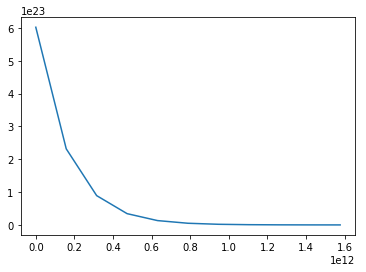

In [4]:
t, N = euler_1d(num_of_atoms, 0, t_final, dt, lambda N,t: -3.9e-12*N)
plt.plot(t, N)

lambda should be avoided for any functions that are larger than a line. But these are great when we have small mathematical functions that we want to use, only once or twice.

# Map

    map(function i want to use, values i want to use this with)
    
In chapter 2 we had a table of different values for the equation we were trying to use bisect on.
    
    f(x) = e^x - 3x^2

In [5]:
# %load equation2
import numpy as np
def equation2(x):
    """
    Equation 2.2 from the book.

    Input
    ----------
    x: Value I want to evaluate equation 2.2 at

    Output
    ----------
    Value of the function at 'x', f(x)
    """
    return np.exp(x) - 3*x**2


In [6]:
foo = [-1, 0, 0.5, 1, 4]
equation2(foo)

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

To do this I had to either use, numpy arrays 

In [7]:
fooA = np.array([-1, 0, 0.5, 1, 4])
equation2(fooA)

array([-2.63212056,  1.        ,  0.89872127, -0.28171817,  6.59815003])

Or set up a for loop

In [8]:
for n in foo:
    print(equation2(n))

-2.6321205588285577
1.0
0.8987212707001282
-0.2817181715409549
6.598150033144236


OR use the map command

In [9]:
list(map(equation2, foo))

[-2.6321205588285577,
 1.0,
 0.8987212707001282,
 -0.2817181715409549,
 6.598150033144236]

In [10]:
list(map(lambda x: np.exp(x) - 3*x**2, foo))

[-2.6321205588285577,
 1.0,
 0.8987212707001282,
 -0.2817181715409549,
 6.598150033144236]

# Filter
Used to filter a list of numbers,

    filter(filter condition, thing I want to filter)


In [19]:
np.random.seed(0)
foo = np.random.randint(0,100,1000000)
print(foo)

[44 47 64 ... 38 26 50]


Lets say I want only the even numbers in this list

In [20]:
list(filter(lambda x: x%2 ==0, foo))

[44,
 64,
 36,
 70,
 88,
 88,
 12,
 58,
 46,
 88,
 72,
 20,
 80,
 64,
 82,
 88,
 14,
 32,
 32,
 74,
 28,
 34,
 0,
 0,
 36,
 38,
 4,
 42,
 58,
 46,
 82,
 0,
 14,
 12,
 42,
 84,
 68,
 6,
 68,
 76,
 52,
 78,
 20,
 58,
 48,
 64,
 94,
 0,
 50,
 36,
 34,
 48,
 98,
 42,
 0,
 10,
 58,
 2,
 98,
 62,
 94,
 82,
 46,
 20,
 50,
 14,
 58,
 36,
 10,
 86,
 2,
 80,
 32,
 54,
 0,
 38,
 46,
 42,
 56,
 60,
 30,
 24,
 2,
 94,
 98,
 40,
 72,
 72,
 26,
 66,
 52,
 14,
 96,
 4,
 86,
 56,
 16,
 24,
 80,
 60,
 32,
 70,
 56,
 24,
 18,
 40,
 54,
 38,
 44,
 88,
 24,
 82,
 76,
 86,
 32,
 84,
 10,
 54,
 28,
 2,
 46,
 20,
 46,
 90,
 50,
 10,
 44,
 34,
 34,
 88,
 36,
 0,
 34,
 80,
 62,
 8,
 40,
 36,
 48,
 30,
 18,
 84,
 2,
 12,
 44,
 66,
 22,
 30,
 70,
 18,
 92,
 46,
 96,
 28,
 58,
 0,
 86,
 16,
 36,
 94,
 24,
 8,
 56,
 32,
 72,
 58,
 64,
 92,
 36,
 32,
 42,
 14,
 86,
 28,
 20,
 82,
 68,
 22,
 72,
 0,
 8,
 4,
 92,
 26,
 74,
 52,
 18,
 34,
 30,
 58,
 18,
 70,
 48,
 94,
 80,
 26,
 58,
 44,
 70,
 38,
 8,
 80,
 22,
 8,
 6,

Now what if I want to find the sum of the even numbers?

In [21]:
sum(filter(lambda x: x%2 ==0, foo))

24517208

In [22]:
def sum_even(x):
    answer = 0
    for n in x:
        if n%2 == 0: #Check if the number is even
            answer += n
    return answer
sum_even(foo)

24517208

In [23]:
sum((filter(lambda x: x%2 ==0, foo))), sum_even(foo)

(24517208, 24517208)

In [24]:
# Lets look at run time
%timeit sum_even(foo)
%timeit sum((filter(lambda x: x%2 ==0, foo)))

328 ms ± 16.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
389 ms ± 1.46 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [28]:
%timeit sum_even(foo)
%timeit np.sum((filter(f, foo)))

321 ms ± 2.46 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.59 µs ± 17.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [26]:
f = lambda x: x%2 ==0